In [239]:
#importing all relevant liabraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=None
import seaborn as sns
import plotly.express as px

import datetime as dt
from tqdm import tqdm
import time

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.stats as stats

In [199]:
df=pd.read_excel('sales_data.xlsx')

In [200]:
df.head(10)

CustomerID  TOTAL_ORDERS   REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124  11986.54                96.67            529.59   
1          29            82  11025.96               134.46             97.92   
2          83            43   7259.69               168.83            171.69   
3          95            44   6992.27               158.92             92.82   
4         124            55   6263.44               113.88            179.04   
5         153            49   5841.24               119.21             96.84   
6         187            43   5470.27               127.22            128.77   
7         219            54   5200.53                96.31            237.53   
8         258            19   4967.06               261.42             51.91   
9         308            21   4726.38               225.07             63.88   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27       2016-12-30        2021-10-24                 14.19   
1             1.19       2018-03-31        2021-10-24                 15.89   
2             3.99       2017-11-30        2021-10-24                 33.12   
3             2.11       2019-04-09        2021-10-24                 21.11   
4             3.26       2020-10-23        2021-10-24                  6.65   
5             1.98       2015-07-26        2021-10-24                 46.57   
6             2.99       2019-01-14        2021-10-24                 23.58   
7             4.40       2019-11-19        2021-10-24                 13.06   
8             2.73       2021-03-03        2021-10-24                 12.37   
9             3.04       2020-01-06        2021-10-24                 31.29   

   DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  \
0                   1             13              13                29   
1                   1             11              13                10   
2                   1              5               4                 3   
3                   1             10               8                 5   
4                   1              2               3                 8   
5                   1              6               7                 9   
6                   1              5               6                 3   
7                   1             17               5                 7   
8                   1              4               6                 5   
9                   1              1               2                 9   

   THURSDAY_ORDERS  FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  \
0               25             19               15             10   
1               13             14               10             11   
2                5              5                8             13   
3                8              5                3              5   
4                8             12               10             12   
5                8              6                7              6   
6                3             11                7              8   
7                4              5                9              7   
8                2              0                0              2   
9                2              3                1              3   

   MONDAY_REVENUE  TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  \
0         1287.50          1054.15            2842.52           2133.79   
1         1253.08          2003.25            1819.75           1114.83   
2          698.95           504.97             197.97           1182.97   
3         1753.95          1400.23             570.48           1154.06   
4          150.98           330.38            1090.23            563.63   
5          563.98           601.00             895.48            818.96   
6          395.70           964.58             588.98            798.97   
7         1612.17           492.45             595.04            458.96   
8 

##### Dataset Insights

In [201]:
df.shape

(5000, 42)

##### Dataset Desciption  
The dataset folder contains the following files:  
train.csv: *5000, 40*  

##### EDA

Features names-

In [202]:
# get all column names
df.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE', 'Unna

Data type and count of features-

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

1. After checking the Dtypes of all the columns 
    1. object - String values
    1. float64 - Numerical values
1. There are more String values than the numerical values in the dataset

##### The describe() method returns description of feature and their interrealtions-

count - The number of not-empty values. <br>
mean - The average (mean) value. <br>
std - The standard deviation. <br>
min - the minimum value. <br>
25% - The 25% percentile*. <br>
50% - The 50% percentile*. <br>
75% - The 75% percentile*. <br>
max - the maximum value. <br>

In [204]:
df.describe()


CustomerID  TOTAL_ORDERS       REVENUE  AVERAGE_ORDER_VALUE  \
count    5000.000000    5000.00000   5000.000000          5000.000000   
mean    40709.227800      12.87040   1681.523840           136.537378   
std     49949.848017      12.67988   1998.618678            91.651569   
min         1.000000       1.00000     38.500000            10.680000   
25%      1687.500000       3.00000    315.097500            83.025000   
50%     13765.000000       8.00000    966.725000           113.160000   
75%     71891.500000      20.00000   2493.072500           160.272500   
max    277160.000000     156.00000  34847.400000          1578.880000   

       CARRIAGE_REVENUE  AVERAGESHIPPING  AVGDAYSBETWEENORDERS  \
count       5000.000000      5000.000000           5000.000000   
mean          46.036376         3.592574            163.159618   
std           47.879226         2.021360            259.699496   
min            0.000000         0.000000              0.000000   
25%            9.980000         2.500000             21.670000   
50%           24.985000         3.660000             57.635000   
75%           76.862500         4.790000            170.357500   
max          529.590000        35.990000           1409.500000   

       DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  WEDNESDAY_ORDERS  \
count         5000.000000    5000.000000      5000.00000       5000.000000   
mean            87.420000       1.629000         1.75440          1.798000   
std             80.156513       2.236506         2.43394          2.464875   
min              1.000000       0.000000         0.00000          0.000000   
25%              7.000000       0.000000         0.00000          0.000000   
50%             68.000000       1.000000         1.00000          1.000000   
75%            171.250000       2.000000         3.00000          3.000000   
max            207.000000      19.000000        23.00000         29.000000   

       THURSDAY_ORDERS  FRIDAY_ORDERS  SATURDAY_ORDERS  SUNDAY_ORDERS  \
count      5000.000000     5000.00000      5000.000000    5000.000000   
mean          2.134000        1.94620         1.683400       1.925400   
std           2.468048        2.65268         2.449972       2.315018   
min           0.000000        0.00000         0.000000       0.000000   
25%           0.000000        0.00000         0.000000       0.000000   
50%           1.000000        1.00000         1.000000       1.000000   
75%           3.000000        3.00000         3.000000       3.000000   
max          32.000000       26.00000        31.000000      23.000000   

       MONDAY_REVENUE  TUESDAY_REVENUE  WEDNESDAY_REVENUE  THURSDAY_REVENUE  \
count     5000.000000      5000.000000        5000.000000       5000.000000   
mean       215.208336       233.510430         235.689294        265.949796   
std        397.831999       411.941787         397.858311        383.890024   
min          0.000000         0.000000           0.000000          0.000000   
25%          0.000000         0.000000           0.000000          0.000000   
50%         74.990000        75.990000          80.990000        144.590000   
75%        286.865000       310.972500         319.992500        344.357500   
max      12819.410000      7853.920000        5877.440000       6434.950000   

       FRIDAY_REVENUE  SATURDAY_REVENUE  SUNDAY_REVENUE  \
count     5000.000000        5000.00000     5000.000000   
mean       250.580554         219.64210      260.943330   
std        400.543113         376.13976      406.926075   
min          0.000000           0.00000        0.000000   
25%          0.000000           0.00000        0.000000   
50%         91.195000          62.41500      135.990000   
75%        352.740000         297.28000      341.367500   
max       6855.220000        4642.97000     8366.350000   

       WEEK1_DAY01_DAY07_ORDERS  WEEK2_DAY08_DAY15_ORDERS  \
count                5000.00000               5000.000000   
mean                    2.9978

##### No of unique values for each column/feature-

In [205]:
for x in df.columns:
    print(x,'-',len(df[x].unique()))

CustomerID - 5000
TOTAL_ORDERS - 85
REVENUE - 4635
AVERAGE_ORDER_VALUE - 4113
CARRIAGE_REVENUE - 1175
AVERAGESHIPPING - 567
FIRST_ORDER_DATE - 1928
LATEST_ORDER_DATE - 207
AVGDAYSBETWEENORDERS - 3563
DAYSSINCELASTORDER - 207
MONDAY_ORDERS - 19
TUESDAY_ORDERS - 22
WEDNESDAY_ORDERS - 22
THURSDAY_ORDERS - 23
FRIDAY_ORDERS - 24
SATURDAY_ORDERS - 24
SUNDAY_ORDERS - 23
MONDAY_REVENUE - 2151
TUESDAY_REVENUE - 2201
WEDNESDAY_REVENUE - 2262
THURSDAY_REVENUE - 2582
FRIDAY_REVENUE - 2378
SATURDAY_REVENUE - 2149
SUNDAY_REVENUE - 2573
WEEK1_DAY01_DAY07_ORDERS - 27
WEEK2_DAY08_DAY15_ORDERS - 34
WEEK3_DAY16_DAY23_ORDERS - 33
WEEK4_DAY24_DAY31_ORDERS - 32
WEEK1_DAY01_DAY07_REVENUE - 3026
WEEK2_DAY08_DAY15_REVENUE - 2900
WEEK3_DAY16_DAY23_REVENUE - 2947
WEEK4_DAY24_DAY31_REVENUE - 3386
TIME_0000_0600_ORDERS - 22
TIME_0601_1200_ORDERS - 41
TIME_1200_1800_ORDERS - 41
TIME_1801_2359_ORDERS - 36
TIME_0000_0600_REVENUE - 1413
TIME_0601_1200_REVENUE - 3203
TIME_1200_1800_REVENUE - 3512
TIME_1801_2359_REVENUE

##### Counting Null (missing values) values- 

In [206]:
# Check for missing values in all the columnns of the train_dataset
df.isnull().sum()

CustomerID                      0
TOTAL_ORDERS                    0
REVENUE                         0
AVERAGE_ORDER_VALUE             0
CARRIAGE_REVENUE                0
AVERAGESHIPPING                 0
FIRST_ORDER_DATE                0
LATEST_ORDER_DATE               0
AVGDAYSBETWEENORDERS            0
DAYSSINCELASTORDER              0
MONDAY_ORDERS                   0
TUESDAY_ORDERS                  0
WEDNESDAY_ORDERS                0
THURSDAY_ORDERS                 0
FRIDAY_ORDERS                   0
SATURDAY_ORDERS                 0
SUNDAY_ORDERS                   0
MONDAY_REVENUE                  0
TUESDAY_REVENUE                 0
WEDNESDAY_REVENUE               0
THURSDAY_REVENUE                0
FRIDAY_REVENUE                  0
SATURDAY_REVENUE                0
SUNDAY_REVENUE                  0
WEEK1_DAY01_DAY07_ORDERS        0
WEEK2_DAY08_DAY15_ORDERS        0
WEEK3_DAY16_DAY23_ORDERS        0
WEEK4_DAY24_DAY31_ORDERS        0
WEEK1_DAY01_DAY07_REVENUE       0
WEEK2_DAY08_DA

<AxesSubplot:>

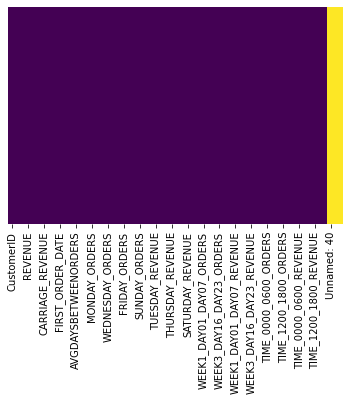

In [207]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Dropping irrelevant "Unnamed" columns

In [208]:
df.drop(['Unnamed: 40', 'Unnamed: 41'], axis=1, inplace= True)  

<AxesSubplot:>

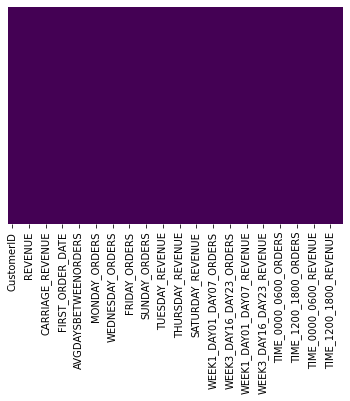

In [209]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### For finding correlation, creating two seperate list to store categorical column names and numerical column names respectively

In [210]:


# looping on whole dataset for geting list of categorical and numerical data column name and storing in respective list variable

categorical_list=[]
var_list=[]


for x in df.columns:
    if df[x].dtype=='object':
        categorical_list.append(x)
    elif df[x].dtype=='int64':
        var_list.append(x)
    elif df[x].dtype=='float64':
        var_list.append(x)
        
print('categorical' ,categorical_list)
print('numerical',var_list)


categorical []
numerical ['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER', 'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS', 'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE']


# Correlation Matrix
#### A correlation matrix is a table shows correlation coefficients between variables.

In [211]:
# Correlation metrix using pandas
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'TOTAL_ORDERS'}>,
        <AxesSubplot:title={'center':'REVENUE'}>,
        <AxesSubplot:title={'center':'AVERAGE_ORDER_VALUE'}>,
        <AxesSubplot:title={'center':'CARRIAGE_REVENUE'}>,
        <AxesSubplot:title={'center':'AVERAGESHIPPING'}>],
       [<AxesSubplot:title={'center':'FIRST_ORDER_DATE'}>,
        <AxesSubplot:title={'center':'LATEST_ORDER_DATE'}>,
        <AxesSubplot:title={'center':'AVGDAYSBETWEENORDERS'}>,
        <AxesSubplot:title={'center':'DAYSSINCELASTORDER'}>,
        <AxesSubplot:title={'center':'MONDAY_ORDERS'}>,
        <AxesSubplot:title={'center':'TUESDAY_ORDERS'}>],
       [<AxesSubplot:title={'center':'WEDNESDAY_ORDERS'}>,
        <AxesSubplot:title={'center':'THURSDAY_ORDERS'}>,
        <AxesSubplot:title={'center':'FRIDAY_ORDERS'}>,
        <AxesSubplot:title={'center':'SATURDAY_ORDERS'}>,
        <AxesSubplot:title={'center':'SUNDAY_ORDERS'}>,
        <AxesSubpl

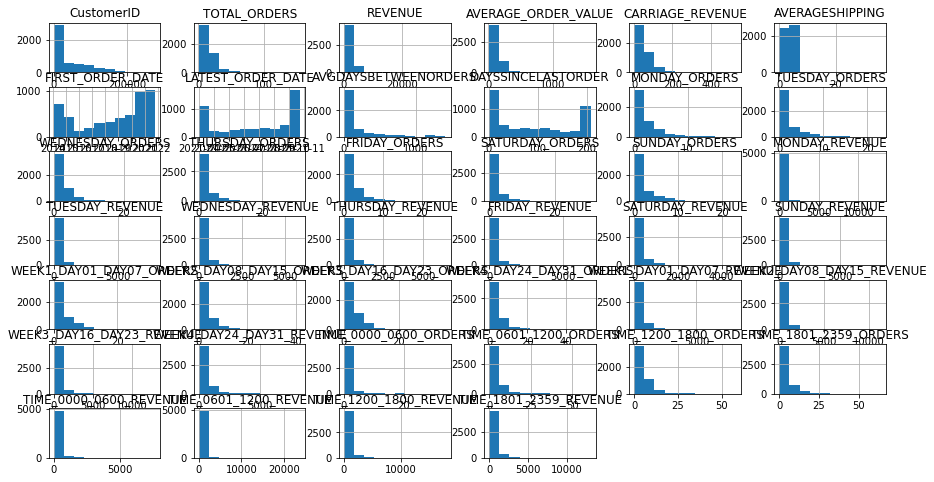

In [212]:
# Histogram using pandas 
df.hist(figsize=(15,8))

<AxesSubplot:xlabel='TOTAL_ORDERS'>

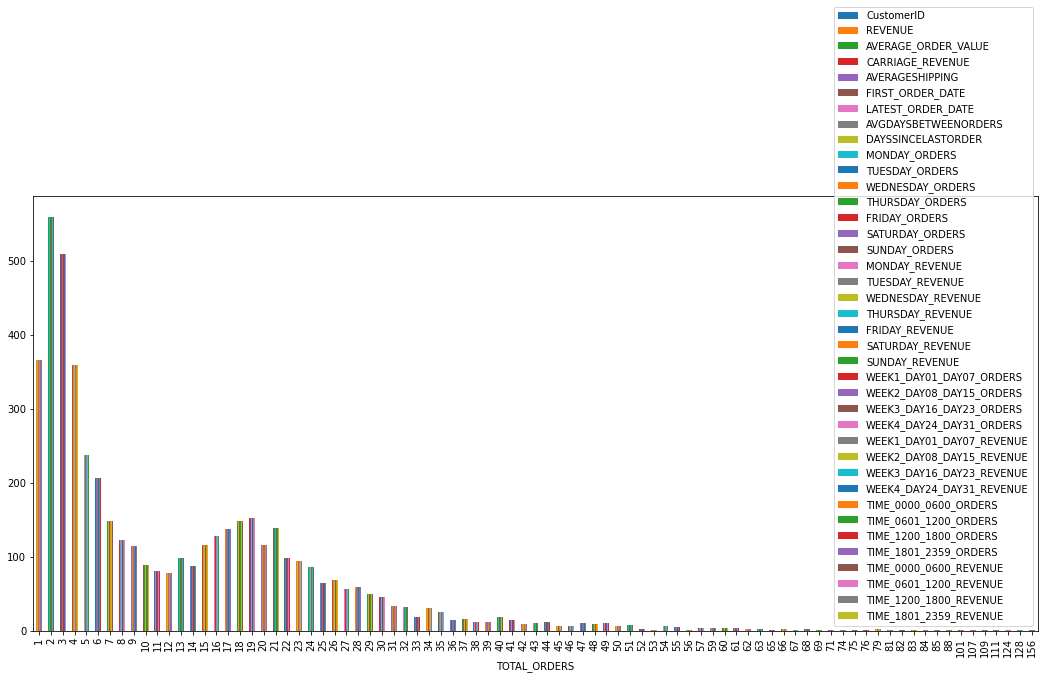

In [213]:
# group data by total order and plot count plot
df.groupby('TOTAL_ORDERS').count().plot(kind='bar',figsize=(18,8))

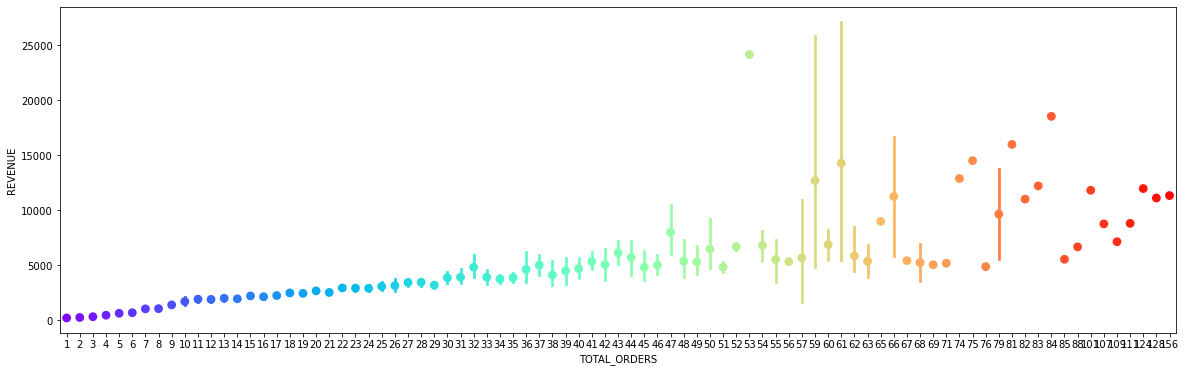

In [214]:
# point plot for REVENUE and TOTAL_ORDERS columns
plt.figure(figsize=(20,6))
sns.pointplot(x='TOTAL_ORDERS',y='REVENUE',data=df,palette='rainbow')
plt.show()

##### for highest, lowest and average amount of order placed-

In [215]:
df['REVENUE'].max()

34847.4

In [216]:
df['REVENUE'].min()

38.5

In [217]:
df['REVENUE'].mean()

1681.5238400000312

 customer who generate revenue > avg revenue (above average category)

In [218]:
df1 =df[df['REVENUE']>1681.5238400000312]

In [219]:
df1.shape

(1845, 40)

customers who generate revenue < avg revenue (below average category)

In [220]:
df2 =df[df['REVENUE']<1681.5238400000312]

In [221]:
df2.shape

(3155, 40)

Maximum , minimum and avg amount of orders placed

In [222]:
df['TOTAL_ORDERS'].max()

156

In [223]:
df['TOTAL_ORDERS'].min()

1

In [224]:
df['TOTAL_ORDERS'].mean()

12.8704

#### RFM:

The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase (DAYSSINCELASTORDER)<br> 

Frequency: How often a customer makes a purchase (AVGDAYSBETWEENORDERS)<br>

Monetary Value: How much money a customer spends on purchases  (REVENUE)<br>


<br>
<br>

-Champions Customers: Bought recently, buy often and spend the most => recency-latest | frequency-high | momentary-high <br>

-Potential Customers: Recent customers with average frequency=> recency-latest | frequency-avg <br>

-Need attention: Below average recency and frequency, Some time since they’ve purchased=> recency-low | frequency-low <br>


In [225]:
df['recency']= df['DAYSSINCELASTORDER']
df['frequency']= df['AVGDAYSBETWEENORDERS']
df['revenue']= df['REVENUE']

rfm= df[['CustomerID','revenue', 'frequency', 'recency']]
rfm.head(10)

CustomerID   revenue  frequency  recency
0          22  11986.54      14.19        1
1          29  11025.96      15.89        1
2          83   7259.69      33.12        1
3          95   6992.27      21.11        1
4         124   6263.44       6.65        1
5         153   5841.24      46.57        1
6         187   5470.27      23.58        1
7         219   5200.53      13.06        1
8         258   4967.06      12.37        1
9         308   4726.38      31.29        1

Outliers-

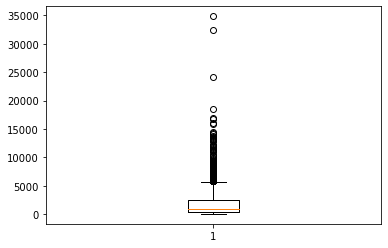

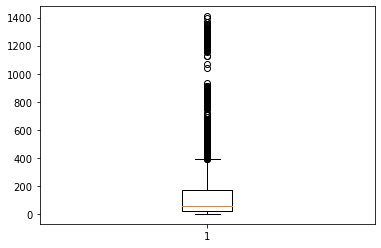

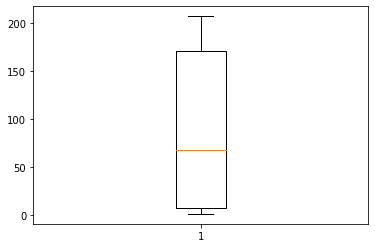

In [226]:
plt.boxplot(rfm['revenue'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['recency'])
plt.show()


Outlier treatment (using interquantiloe range)-

In [227]:

q1_rev = rfm['revenue'].quantile(0.05)
q3_rev= rfm['revenue'].quantile(0.95)
IQR = q3_rev - q1_rev
rfm = rfm[(rfm['revenue'] >= q1_rev - 1.5*IQR) & (rfm['revenue'] <= q3_rev + 1.5*IQR)]

q1_freq = rfm['frequency'].quantile(0.05)
q3_freq = rfm['frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
rfm = rfm[(rfm['frequency'] >= q1_freq - 1.5*IQR) & (rfm['frequency'] <= q3_freq + 1.5*IQR)]

q1_rec = rfm['recency'].quantile(0.05)
q3_rec = rfm['recency'].quantile(0.95)
IQR = q3_rec - q1_rec
rfm = rfm[(rfm['recency'] >= q1_rec - 1.5*IQR) & (rfm['recency'] <= q3_rec + 1.5*IQR)]

Scaling-

In [228]:
#Scaling the features
scale = StandardScaler()
cols = ['revenue', 'frequency', 'recency']
rfm_scaler = scale.fit_transform(rfm[cols])

In [229]:
rfm_scaled = pd.DataFrame(rfm_scaler)
rfm_scaled.columns = ['revenue', 'frequency', 'recency']
rfm_scaled.head()

revenue  frequency   recency
0  6.032833  -0.574806 -1.078028
1  5.473669  -0.568268 -1.078028
2  3.281285  -0.502009 -1.078028
3  3.125618  -0.548194 -1.078028
4  2.701358  -0.603801 -1.078028

Hopkins Statistic- checks if points are well spaced for clustering

In [230]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [231]:
hopkins(rfm_scaled)

0.9696560576456819

##### Building Model (Hierarchial Cluster)

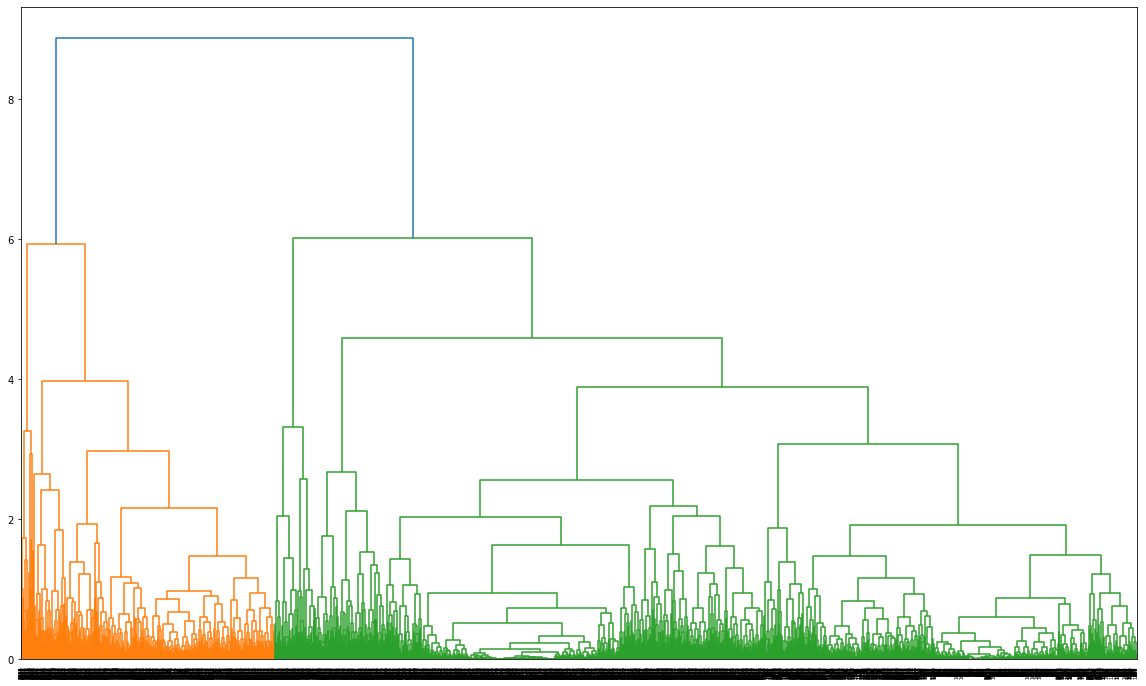

In [232]:
# complete linkage
plt.figure(figsize=(20,12))

mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [233]:
# clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 1, 1, 2])

In [234]:

# assign cluster labels
pd.set_option('display.max_rows', None)
rfm['cluster_labels'] = cluster_labels
rfm.head(10)

CustomerID   revenue  frequency  recency  cluster_labels
0          22  11986.54      14.19        1               0
1          29  11025.96      15.89        1               0
2          83   7259.69      33.12        1               0
3          95   6992.27      21.11        1               0
4         124   6263.44       6.65        1               0
5         153   5841.24      46.57        1               0
6         187   5470.27      23.58        1               0
7         219   5200.53      13.06        1               0
8         258   4967.06      12.37        1               0
9         308   4726.38      31.29        1               0

Analysing using box plots of 3 cluster: <br> <br>
-The box in the box plot indicates the range in which the middle 50% of all the data lies <br>
-the upper horizontal edge of box is q3 and similarly lower one is q1 25% data lies above and below q3 and q1 respectively (q3 to q1 is IQR) <br>
-The solid line in box is median <br>
-outside of wiskers are outliers <br>

<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

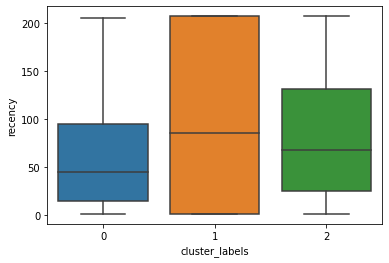

In [235]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=rfm)

*above median line- customers with recency more than 50 (median) or less recent <br>
*below median line- customers with recency less than 50 (median) or more recent <br>

cluster 0 : 20-40 (20) q1 40-90 (50) q3  2:5 less recent coustomers than cluster 1 <br>
cluster 1 : 0-80 (80) q1 80-200 (120) q3  2:3 <br>
cluster 2 : 30-60 (30) q1 60-130 (70) q3  3:7 least recent coutomers of all or bad  recency (less recent orders) <br>

cluster 1> cluster 0> cluster 2 (recency or R)

<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

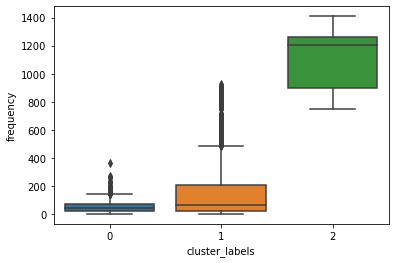

In [236]:

# plots
sns.boxplot(x='cluster_labels', y='frequency', data=rfm)

Cluster 2 frequency is highest, then its cluster 0, then cluster 1 <br> <br>
cluster 2 > cluster 0 > cluster 1 (Frequency or F) 

<AxesSubplot:xlabel='cluster_labels', ylabel='revenue'>

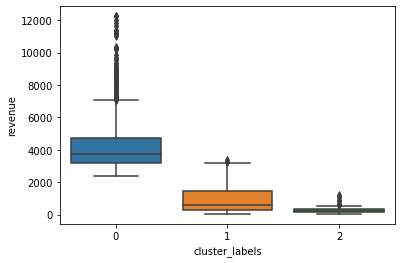

In [237]:
# plots
sns.boxplot(x='cluster_labels', y='revenue', data=rfm)

cluster 2> cluster 1 > cluster 0 (revenue or M)

##### Concluding <br>

cluster 1> cluster 0> cluster 2 (recency or R) <br>

cluster 2 > cluster 0 > cluster 1 (Frequency or F) <br>

cluster 2> cluster 1 > cluster 0 (revenue or M) <br>

-Champions Customers:=> recency-high | frequency-high | momentary-high;  So, cluster 2 <br> 

-Potential Customers:=> recency-high | frequency-avg; So, cluster 1 <br> 

-Need attention:=> recency-low | frequency-low; So, cluster 0 <br> 